In [ ]:
'''
1. La regresión buscan encontrar la relación ideal entre la información de entrada y de salida.
2. La información de salida esperada producida por está relación puede coincidir con la información de salidad real.
3. En general buscamos que la varianza entre la información esperada por la relación y la información real sea mínima.
4. Según este criterio extraemos los parámetros de esta aplicación o función.
5. En argot algebraico buscamos que la derivada o gradiente de la función multivariable sea cero. A este proceso llamamos modelamiento o en su forma anglosajona "model training".
6. Visualmente está función suele dibujar una recta o una curva si son dos variables. Una superficie si son tres variables. Hipersuperficies si la aplicación es multivaribale.
'''

In [1]:
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import numpy as np

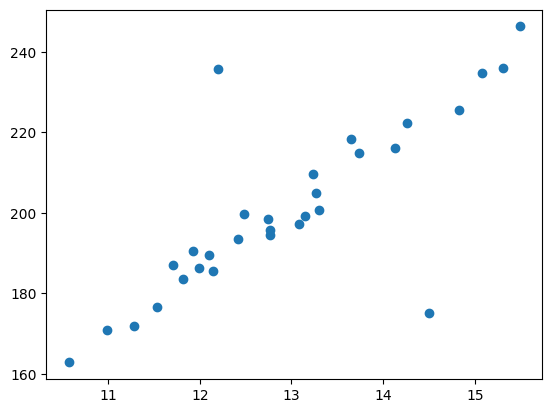

In [2]:
# Verbi gratia, usemos estos datos de entrada y salida
entrada = [12.7612, 13.6485, 13.1478, 13.083,  11.5287, 12.4844, 15.0756, 13.304, 12.2, 12.1433, 12.4155, 12.7465, 11.2785, 13.2355, 13.7312, 14.2646, 12.097, 11.7031, 15.4878, 10.5718, 14.5, 11.9918, 12.7646, 13.2639, 15.309,  14.8242, 11.8201, 11.9288, 14.1301, 10.9936]
salida = [194.3777, 218.354, 199.1601, 197.1771, 176.4693, 199.5988, 234.7653, 200.5837, 235.8, 185.5133, 193.3814, 198.5673, 171.9937, 209.5389, 214.8253, 222.4046, 189.6184, 187.0903, 246.3096, 162.8051, 175.2, 186.1781, 195.7193, 205.0429, 235.877, 225.5603, 183.5358, 190.4709, 216.1854, 170.9517]
# Veámos ahora su representación gráfica
plt.scatter(entrada, salida)
plt.show()

In [3]:
# Cargamos las rutinas de regresiónc lineal
reg = LinearRegression()
# Alimentamos los datos de entrada y salida
entrada = np.array(entrada).reshape(30,1)
salida = np.array(salida).reshape(30,1)
ajuste = reg.fit(entrada, salida)

In [4]:
# Veámos cuán bueno es el ajuste lineal
ajuste.score(entrada, salida)

0.6425027545517807

In [5]:
# Ahora el objetivo es extraer los parámteros que caracterizan este ajuste. 
# En este caso tenemos un parámtero para un único tipo de entrada. Sólo tenemos medidas de un factor del problema.
ajuste.coef_

array([[13.25985511]])

In [6]:
# Otro parámetro es el intercepto
ajuste.intercept_

array([29.08251377])

In [7]:
# Usando los parámetros extraídos podemos ver cuáles hubieran sido los datos de salidas bajo condiciones ideales con los mismos datos de entrada
# Estos parámetros han sido cargados en las rutinas de predicción luego del ajuste.
salida_ideal = reg.predict(entrada)

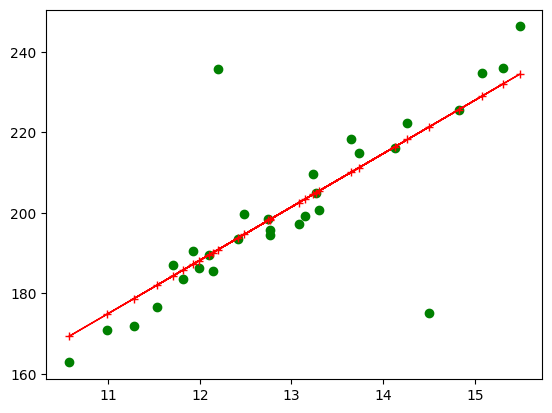

In [14]:
plt.scatter(entrada, salida, color="green")
plt.plot(entrada, salida_ideal, color="red", linewidth=1, marker='+')
plt.show()

In [ ]:
'''
Una práctica común es separar la información en dos grupos. 
El primer grupo se usará para calcular los parámetros. La correspondiente información de entrada será el dominio de ensayo y su salida será el codominio de ensayo.
El segundo grupo se utilizará para estimar el grado de confianza de loa parámteros extraídos. Aquí también tenemos un dominio de evaluación y un codominio de evaluación.
'''

In [9]:
dominio_ensayo = entrada[:20]
codominio_ensayo = salida[:20]
dominio_evaluacion = entrada[20:]
codominio_evaluacion = salida[20:]

In [10]:
# Ahora hagamos el ajuste usando la información adquirida para el ensayo
ajuste = reg.fit(dominio_ensayo, codominio_ensayo)

In [11]:
# La salida bajo condiciones ideales
salida_ideal2 = reg.predict(entrada)

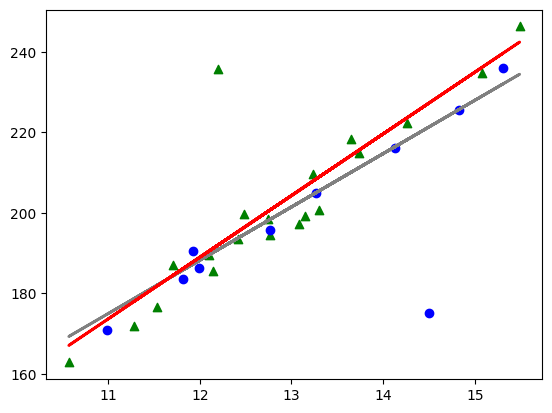

In [12]:
plt.scatter(dominio_ensayo, codominio_ensayo, color="green", marker='^')
plt.scatter(dominio_evaluacion, codominio_evaluacion, color="blue")
plt.plot(entrada, salida_ideal, color="grey", linewidth=2)
plt.plot(entrada, salida_ideal2, color="red", linewidth=2)
plt.show()